### 1 Loading Dataset

In [1]:
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import os
import random
from torchvision import transforms

from models.my_datasets import MyDataset2
from models.my_models_CNN import MyModel_CNN
#from models.my_models_alex import MyModel_CNN


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())
print(device)

True
cuda:0


In [4]:
'''
ROOT = './output/town04_image_data/images/'
OUT = './output/town04_image_data/smallimages/'
SIZE = (400,300)
image_paths = os.listdir(ROOT)
image_paths.sort()
for im in image_paths:
    #print(im)
    img = cv2.imread(ROOT+im)
    img = cv2.resize(img, SIZE,  interpolation = cv2.INTER_AREA)
    cv2.imwrite(OUT+im, img)
'''

"\nROOT = './output/town04_image_data/images/'\nOUT = './output/town04_image_data/smallimages/'\nSIZE = (400,300)\nimage_paths = os.listdir(ROOT)\nimage_paths.sort()\nfor im in image_paths:\n    #print(im)\n    img = cv2.imread(ROOT+im)\n    img = cv2.resize(img, SIZE,  interpolation = cv2.INTER_AREA)\n    cv2.imwrite(OUT+im, img)\n"

In [5]:
'''
#### delete the data for the unstored images
ROOT = './output/town04_image_data/'
out = open(ROOT+"alldata.txt",'w')
lines=[]
with open(ROOT+"offdata_image.txt", 'r') as infile:
    for line in infile:
        line = line.rstrip()
        words = line.split()
        img = cv2.imread(ROOT+words[0])
        if img is None:
            pass
        else:
            out.write(line)
            out.write('\r\n')
out.close()
'''

'\n#### delete the data for the unstored images\nROOT = \'./output/town04_image_data/\'\nout = open(ROOT+"alldata.txt",\'w\')\nlines=[]\nwith open(ROOT+"offdata_image.txt", \'r\') as infile:\n    for line in infile:\n        line = line.rstrip()\n        words = line.split()\n        img = cv2.imread(ROOT+words[0])\n        if img is None:\n            pass\n        else:\n            out.write(line)\n            out.write(\'\r\n\')\nout.close()\n'

In [6]:
'''
#### compute the delta imformation from the original information
ROOT = './output/town04_image_data/'
out = open(ROOT+"delta.txt",'w')
delta_data = np.empty((0,3))
with open(ROOT+"data_image_all.txt", 'r') as infile:
    for line in infile:
        line = line.rstrip()
        words = line.split()
        newline = np.array([[float(words[1])-float(words[2]), float(words[3]), float(words[4])]])
        delta_data = np.append(delta_data, newline, axis=0)
        
np.set_printoptions(threshold = np.inf)
out.write(str(repr(np.array(delta_data))))
out.close()
'''

'\n#### compute the delta imformation from the original information\nROOT = \'./output/town04_image_data/\'\nout = open(ROOT+"delta.txt",\'w\')\ndelta_data = np.empty((0,3))\nwith open(ROOT+"data_image_all.txt", \'r\') as infile:\n    for line in infile:\n        line = line.rstrip()\n        words = line.split()\n        newline = np.array([[float(words[1])-float(words[2]), float(words[3]), float(words[4])]])\n        delta_data = np.append(delta_data, newline, axis=0)\n        \nnp.set_printoptions(threshold = np.inf)\nout.write(str(repr(np.array(delta_data))))\nout.close()\n'

In [7]:
#preprocess the txt file
ROOT = './output/town04_data/trajectory1_pjx/'
train_out = open(ROOT+"traindata_shuffle.txt",'w')
val_out = open(ROOT+"valdata_shuffle.txt",'w')
over_out = open(ROOT+"overdata_shuffle.txt",'w')
lines=[]
with open(ROOT+"data_all.txt", 'r') as infile:
    for line in infile:
        lines.append(line)
    random.shuffle(lines)
    num_train = np.ceil(0.85*len(lines))
    for count, line in enumerate(lines):
        if count <=num_train:
            if count>=25 and count<=35:
                print(line)
                over_out.write(line)
            train_out.write(line)
        else:
            val_out.write(line) 
train_out.close()            
val_out.close()
over_out.close()        

images_off/traj3_000130_03_05.png -15.400992393493652 -243.2406005859375 1.716253525003117 14.71961465378797 -13.507819175720215 -254.91734313964844 2.242531307499981 10.858845505013758 0.999999999998921 -0.6993662381710568

images_off/traj1_000560_04_01.png -3.52687931060791 -288.6733093261719 2.0606214260810285 9.935275923985431 -0.9093541502952576 -297.00396728515625 2.176896903486651 10.424831968028455 1.9976255905848633e-14 -0.9999999999999425

images_on/000122_2.png 382.0631103515625 -183.5748748779297 1.5544274734708337 4.939576285193618 382.1448669433594 -191.1739959716797 1.5923080105000116 4.986300537786222 0.2889066660118707 -0.008141696205994675

images_off/pjx_3_000760_02_12.png 334.88427734375 -123.30331420898438 3.06692880190055 4.9057189185027035 342.30889892578125 -123.26493835449219 2.1904843513682355 5.1108169200676725 0.07511022391559222 0.9999999999999616

images_off/pjx_1_000550_10_12.png 382.2666015625 -196.11941528320312 1.6022976609069535 4.9378006346758445 381

In [8]:
TRANSFORM = transforms.Compose([#transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5, ))])

                                #transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])
SIZE = (200,150)
over_data = MyDataset2(root = ROOT, txtname = 'overdata_shuffle.txt', transform=TRANSFORM, size=SIZE)
train_data = MyDataset2(root = ROOT, txtname = 'traindata_shuffle.txt' , transform = TRANSFORM, size= SIZE)
val_data = MyDataset2(root = ROOT, txtname = 'valdata_shuffle.txt', transform = TRANSFORM, size= SIZE)
over_loader = DataLoader(dataset=over_data, batch_size=32, shuffle=True)
train_loader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset=val_data, batch_size=32, shuffle=True)
print("Overfit size: %i" % len(over_data))
print("Train size: %i" % len(train_data))
print("Validation size: %i" % len(val_data))

Overfit size: 11
Train size: 53626
Validation size: 9462


In [9]:
print(over_data[0][0][0].shape)
cv2.imshow('Window',over_data[0][0][0])
cv2.waitKey(0)
cv2.destroyAllWindows()

torch.Size([1, 150, 200])


error: OpenCV(4.5.4) :-1: error: (-5:Bad argument) in function 'imshow'
> Overload resolution failed:
>  - mat is not a numpy array, neither a scalar
>  - Expected Ptr<cv::cuda::GpuMat> for argument 'mat'
>  - Expected Ptr<cv::UMat> for argument 'mat'


### 2 Defining Neural Network

In [10]:
mynet= MyModel_CNN().to(device)
print(mynet)

MyModel_CNN(
  (expands): Conv2d(1, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (predict): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3870, o

In [11]:
total_params = sum(p.numel() for p in mynet.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in mynet.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} trainable parameters.')

4,452,704 total parameters.
4,452,704 trainable parameters.


### 3 Training Neural network

In [12]:
mycriterion = nn.MSELoss(reduction='mean') 
myoptimizer = optim.Adam(mynet.parameters(), lr=1e-6, eps = 1e-08) 

In [13]:
def run_epoch(model,criterion,optimizer,dataloader,iftrain):    
    running_loss1 = 0.0  
    running_loss2 = 0.0
    #Iterating through the minibatches of the data
    for i, data in enumerate(dataloader, 0): 
        X, y1, y2 = data
        X = [x.cuda() for x in X]
        y1 = y1.to(device).float()
        y2 = y2.to(device).float()
        #Y = [y.cuda() for y in Y]
        #X = torch.tensor(X)
        #Y = torch.as_tensor(np.array(Y))
        #print(X.shape)
        if iftrain:  
            optimizer.zero_grad()
            y_pred = model(X)
            y_pred1 = y_pred[:,0].float()
            y_pred2 = y_pred[:,1].float()
            loss1 = criterion(y_pred1, y1)
            loss2 = criterion(y_pred2, y2) 
            loss = loss1 + loss2
            #print(y)
            #print(y_pred)
            loss.backward()             
            optimizer.step()            
            running_loss1 += loss1.item() 
            running_loss2 += loss2.item() 
            #print('x', X[1])
            #print('prediction', y_pred)
            #print('gt', y)
        else:
            y_pred = y_pred = model(X)
            y_pred1 = y_pred[:,0].float()
            y_pred2 = y_pred[:,1].float()
            loss1 = criterion(y_pred1, y1)
            loss2 = criterion(y_pred2, y2) 
            loss = loss1 + loss2 
            running_loss1 += loss1.item() 
            running_loss2 += loss2.item()     
    return running_loss1, running_loss2

In [14]:
# test if the model will overfit with only one sample
max_epochs = 200
train_history_th = []
train_history_st = []
val_history_th = []
val_history_st = []
myoptimizer = optim.Adam(mynet.parameters(), lr=1e-4, eps = 1e-08) 
#scheduler = optim.lr_scheduler.CosineAnnealingLR(myoptimizer, max_epochs)
for epoch in range(max_epochs): 
    '''
    if epoch >= 1999 and epoch <= 2999:
        myoptimizer.param_groups[0]['lr'] = 1e-5
    elif epoch > 2999:
        myoptimizer.param_groups[0]['lr'] = 1e-6
    scheduler.step()
    '''
    train_loss1, train_loss2 = run_epoch(model=mynet,criterion=mycriterion,
                           optimizer=myoptimizer,dataloader=over_loader,
                           iftrain=True)
    train_history_th.append(train_loss1)
    train_history_st.append(train_loss2)
    val_loss1, val_loss2 =  run_epoch(model=mynet,criterion=mycriterion,
                           optimizer=myoptimizer,dataloader=over_loader,
                           iftrain=False)
    val_history_th.append(val_loss1)
    val_history_st.append(val_loss2)
    if epoch % 10 == 9:
        print(f"Epoch {epoch + 1: >3}/{max_epochs} \nThrottle: train_loss: %2e, val_loss: %2e \nSteering Angle: train_loss: %2e, val_loss: %2e "% 
          (train_loss1, val_loss1, train_loss2, val_loss2))
        #print(scheduler.get_last_lr())

Epoch  10/200 
Throttle: train_loss: 3.551230e-02, val_loss: 2.596163e-02 
Steering Angle: train_loss: 3.856241e-02, val_loss: 1.803605e-02 
Epoch  20/200 
Throttle: train_loss: 8.009193e-03, val_loss: 2.785644e-03 
Steering Angle: train_loss: 7.589693e-03, val_loss: 4.245000e-03 
Epoch  30/200 
Throttle: train_loss: 4.599959e-03, val_loss: 3.907646e-03 
Steering Angle: train_loss: 2.240815e-03, val_loss: 1.333040e-03 
Epoch  40/200 
Throttle: train_loss: 8.503094e-04, val_loss: 1.316443e-03 
Steering Angle: train_loss: 5.701184e-04, val_loss: 6.492198e-04 
Epoch  50/200 
Throttle: train_loss: 1.680560e-04, val_loss: 1.728353e-04 
Steering Angle: train_loss: 3.128790e-04, val_loss: 1.996357e-04 
Epoch  60/200 
Throttle: train_loss: 1.674888e-04, val_loss: 9.360404e-05 
Steering Angle: train_loss: 1.032663e-04, val_loss: 6.960880e-05 
Epoch  70/200 
Throttle: train_loss: 6.714362e-05, val_loss: 5.142192e-05 
Steering Angle: train_loss: 3.441020e-05, val_loss: 2.698964e-05 
Epoch  80/200

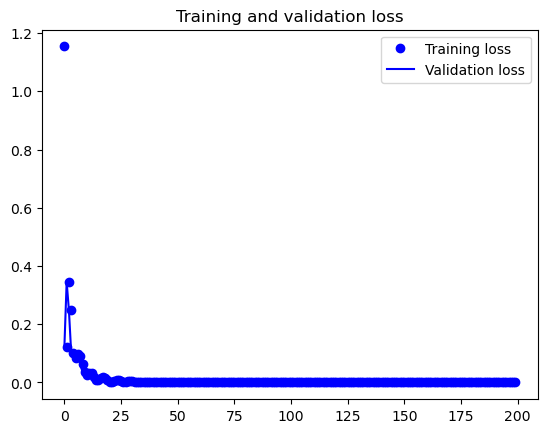

In [15]:
# plot the train&validation loss curve with only one sample
epochs = range(len(train_history_th))
plt.figure()
plt.plot(epochs, train_history_th, 'bo', label='Training loss')
plt.plot(epochs, val_history_th, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()
plt.show()

In [16]:
mynet.eval()
TEST = random.randint (0, 11)
test_in, gt_th, gt_st = over_data[TEST]
test_in = [torch.tensor(x).cuda() for x in test_in]
gt_output = [gt_th, gt_st]
gt_output = torch.tensor(gt_output).to(device)
output_pred = mynet(test_in) 
#print('TEST', TEST)
print('test_in',test_in[1])
print('prediction:{}, ground truth:{}'.format(output_pred.cpu().detach().numpy(), gt_output))

test_in tensor(4.9378, device='cuda:0')
prediction:[[1.0000051  0.12588508]], ground truth:tensor([1.0000, 0.1259], device='cuda:0', dtype=torch.float64)


/home/melina/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


In [17]:
# start the main training process

num_trainbatch = np.ceil(len(train_data)/32) 
num_valbatch = np.ceil(len(val_data)/32) 
train_history_th = []
train_history_st = []
val_history_th = []
val_history_st = []

min_loss = 100000
current_patience = 0
patience = 5



In [ ]:
myoptimizer = optim.Adam(mynet.parameters(), lr=1e-6, eps = 1e-08) 
max_epochs = 50
print('Start training!')
for epoch in range(max_epochs): 
    '''
    if epoch >= 29 and epoch <= 39:
        myoptimizer.param_groups[0]['lr'] = 1e-5
    elif epoch > 39:
        myoptimizer.param_groups[0]['lr'] = 1e-6
    '''
    train_loss1, train_loss2 = run_epoch(model=mynet,criterion=mycriterion,
                           optimizer=myoptimizer,dataloader=train_loader,
                           iftrain=True)
    train_history_th.append(train_loss1/num_trainbatch)
    train_history_st.append(train_loss2/num_trainbatch)
    val_loss1, val_loss2 =  run_epoch(model=mynet,criterion=mycriterion,
                           optimizer=myoptimizer,dataloader=val_loader,
                           iftrain=False)
    val_history_th.append(val_loss1/num_valbatch)
    val_history_st.append(val_loss2/num_valbatch)
    #if epoch % 10 == 9:
    print(f"Epoch {epoch + 1: >3}/{max_epochs} \nThrottle: train_loss: %2e, val_loss: %2e \nSteering Angle: train_loss: %2e, val_loss: %2e "% 
          (train_loss1/num_trainbatch, val_loss1/num_valbatch, train_loss2/num_trainbatch, val_loss2/num_valbatch))
'''
    # early stopping
    if min_loss == 100000 or val_loss < min_loss :
        min_loss = val_loss
        current_patience = 0
        torch.save(mynet.state_dict(),'mynet.pth')
      
    else :
        current_patience += 1 
        if current_patience >= patience :
            print("Stopping early at epoch {}!".format(epoch+1)) 
            break   '''

print('FINISH.')

Start training!
Epoch   1/50 
Throttle: train_loss: 1.179720e-03, val_loss: 1.870404e-02 
Steering Angle: train_loss: 9.680483e-04, val_loss: 1.899589e-02 
Epoch   2/50 
Throttle: train_loss: 9.606909e-04, val_loss: 1.848582e-02 
Steering Angle: train_loss: 8.160327e-04, val_loss: 1.899466e-02 
Epoch   3/50 
Throttle: train_loss: 8.516125e-04, val_loss: 1.842337e-02 
Steering Angle: train_loss: 7.380844e-04, val_loss: 1.887489e-02 
Epoch   4/50 
Throttle: train_loss: 7.730620e-04, val_loss: 1.834213e-02 
Steering Angle: train_loss: 6.810806e-04, val_loss: 1.880180e-02 
Epoch   5/50 
Throttle: train_loss: 7.082921e-04, val_loss: 1.823465e-02 
Steering Angle: train_loss: 6.359492e-04, val_loss: 1.905984e-02 
Epoch   6/50 
Throttle: train_loss: 6.564486e-04, val_loss: 1.824716e-02 
Steering Angle: train_loss: 5.977653e-04, val_loss: 1.877883e-02 
Epoch   7/50 
Throttle: train_loss: 6.125620e-04, val_loss: 1.816603e-02 
Steering Angle: train_loss: 5.650095e-04, val_loss: 1.873514e-02 
Epoc

In [23]:
# plot the train&validation loss curve 
epochs = range(len(train_history_th))
plt.figure()
plt.plot(epochs, train_history_th, 'b', label='Training loss')
plt.plot(epochs, val_history_th, 'r', label='Validation loss')
plt.title('Training and validation loss')

plt.legend()
plt.show()


ValueError: x and y must have same first dimension, but have shapes (23,) and (22,)

In [26]:
# save trained model
torch.save(mynet.state_dict(),'./models/mynet_alexnet_1.pth')

In [15]:
mynet.load_state_dict(torch.load('./models/mynet_alexnet_all_4.pth'))

<All keys matched successfully>

In [25]:
for i in range (21):
    TEST = random.randint (0, 2900)
    test_in, gt_th, gt_st = val_data[TEST]
    test_in = [torch.tensor(x).cuda() for x in test_in]
    gt_output = [gt_th, gt_st]
    gt_output = torch.tensor(gt_output).to(device)
    output_pred = mynet(test_in) 
    #print('TEST', TEST)
    #print('test_in',test_in)
    print('prediction:{}, ground truth:{}'.format(output_pred.cpu().detach().numpy(), gt_output.cpu().detach().numpy()))

prediction:[[ 0.37571758 -0.02146863]], ground truth:[ 0.33001755 -0.0320853 ]
prediction:[[ 0.49417245 -0.02807501]], ground truth:[ 0.55259206 -0.04712439]
prediction:[[-0.00096686 -0.02700344]], ground truth:[ 4.07686433e-14 -2.76466643e-02]
prediction:[[ 0.3470227  -0.00972778]], ground truth:[ 0.35624558 -0.0006141 ]
prediction:[[0.97774863 0.23365976]], ground truth:[1.         0.11941857]
prediction:[[ 0.629377   -0.19288659]], ground truth:[ 0.44922987 -0.24013502]
prediction:[[0.26414663 0.00900005]], ground truth:[0.22469821 0.04141541]
prediction:[[1.0165029  0.98445576]], ground truth:[1.         0.99078671]
prediction:[[1.0424839  0.10771824]], ground truth:[1.         0.09920795]
prediction:[[0.98704827 0.00537097]], ground truth:[1.         0.00656906]
prediction:[[ 0.89920515 -0.5916534 ]], ground truth:[ 1.         -0.48886307]
prediction:[[0.00513009 0.00737754]], ground truth:[ 7.49754142e-16 -8.22064573e-03]
prediction:[[ 0.2712327  -0.04734502]], ground truth:[ 0.2

/home/melina/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.
